#01

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" 
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

infected = pd.read_csv(infected_dataset_url)
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.drop(axis=1,columns=['Lat','Long'],inplace=True)
recovered.drop(axis=1,columns=['Lat','Long'],inplace=True)
deaths.drop(axis=1,columns=['Lat','Long'],inplace=True)

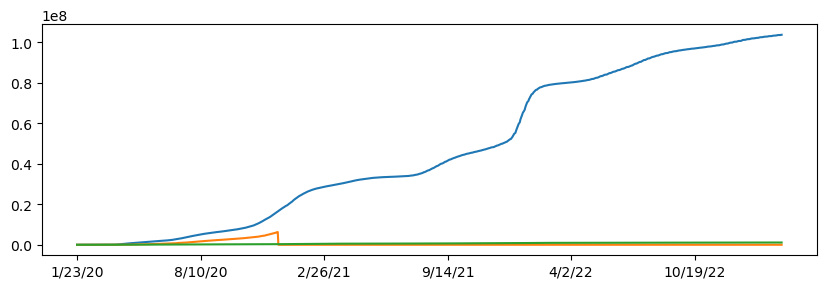

In [85]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
deaths.loc['US'][2:].plot()
plt.show()

C:\Users\29429\AppData\Local\Temp\ipykernel_37800\2482716234.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


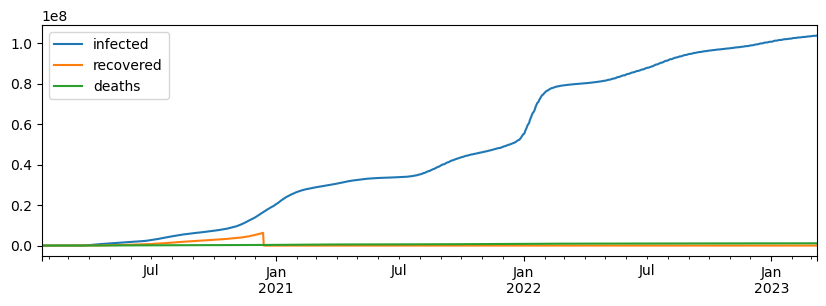

In [86]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country][1:],
                        'recovered' : recovered.loc[country][1:],
                        'deaths' : deaths.loc[country][1:]})
    df.index = pd.to_datetime(df.index)
    return df

df= mkframe('US')
#'China','Australia','Canada','France'
df.plot()
plt.show()

In [87]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

KeyError: 'ninfected'